In [1]:
import os
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

In [2]:
if os.getcwd().split("\\")[-1] == "modeling":
    os.chdir(os.path.join(os.getcwd(), '..'))

import problem

In [3]:
X_train, y_train = problem.get_train_data()
X_test, y_test = problem.get_test_data()

Basic Ridge

In [4]:
date_encoder = FunctionTransformer(problem._encode_dates)
date_cols = problem._encode_dates(X_train[["date"]]).columns.tolist()

categorical_encoder = OneHotEncoder(handle_unknown="ignore")
categorical_cols = ["counter_name", "site_name"]

preprocessor = ColumnTransformer(
    [
        ("date", OneHotEncoder(handle_unknown="ignore"), date_cols),
        ("cat", categorical_encoder, categorical_cols),
    ]
)

regressor = Ridge()

pipe = make_pipeline(date_encoder, preprocessor, regressor)
pipe.fit(X_train, y_train)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_dates at 0x000001CE55CD7CA0>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['year', 'month', 'day',
                                                   'weekday', 'hour']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['counter_name',
                                                   'site_name'])])),
                ('ridge', Ridge())])

In [5]:
predicted_X_train = pipe.predict(X_train)
predicted_X_test = pipe.predict(X_test)

print(
    f"Train set, RMSE={mean_squared_error(y_train, predicted_X_train, squared=False):.2f}"
)
print(
    f"Test set, RMSE={mean_squared_error(y_test, predicted_X_test, squared=False):.2f}"
)

Train set, RMSE=0.80
Test set, RMSE=0.73


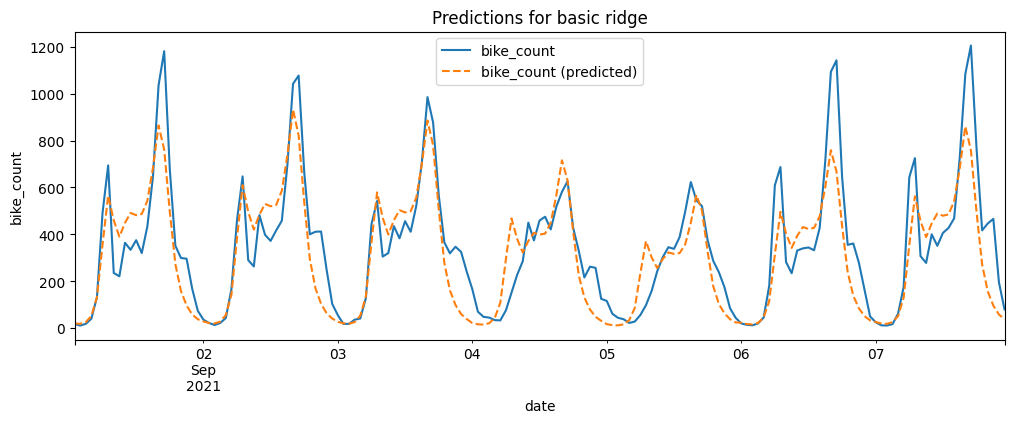

In [6]:
problem.week_plot(X_test, predicted_X_test, y_test, "basic ridge")


c:\Python\envs\bikes-ramp\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


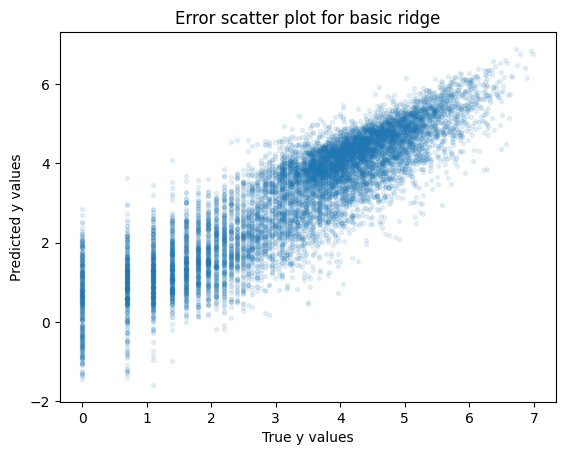

In [7]:
problem.error_plot(predicted_X_test,y_test,'basic ridge')

### Ridge including additional data variables

In [8]:
date_encoder = FunctionTransformer(problem._encode_dates, kw_args={"drop_date": False})
date_cols = problem._encode_dates(X_train[["date"]]).columns.to_list()

add_date_encoder = FunctionTransformer(problem._additional_date_variables)
add_date_cols = ["season"]

categorical_encoder = OneHotEncoder(handle_unknown="ignore")
categorical_cols = ["counter_name", "site_name"]

preprocessor = ColumnTransformer(
    [
        ("date", OneHotEncoder(handle_unknown="ignore"), date_cols),
        ("add_date", OneHotEncoder(handle_unknown="ignore"), add_date_cols),
        ("cat", categorical_encoder, categorical_cols),
    ]
)

regressor = Ridge()

pipe = make_pipeline( date_encoder, add_date_encoder, preprocessor, regressor)
pipe.fit(X_train, y_train)

Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function _encode_dates at 0x000001CE55CD7CA0>,
                                     kw_args={'drop_date': False})),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function _additional_date_variables at 0x000001CE55CDF0D0>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['year', 'month', 'day',
                                                   'weekday', 'hour']),
                                                 ('add_date',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['season']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['counter_name',
                                                   'site_name'])])),
                ('ridge', Ridge())])

In [9]:
predicted_X_train = pipe.predict(X_train)
predicted_X_test = pipe.predict(X_test)

print(
    f"Train set, RMSE={mean_squared_error(y_train, predicted_X_train, squared=False):.2f}"
)
print(
    f"Test set, RMSE={mean_squared_error(y_test, predicted_X_test, squared=False):.2f}"
)

Train set, RMSE=0.80
Test set, RMSE=0.72


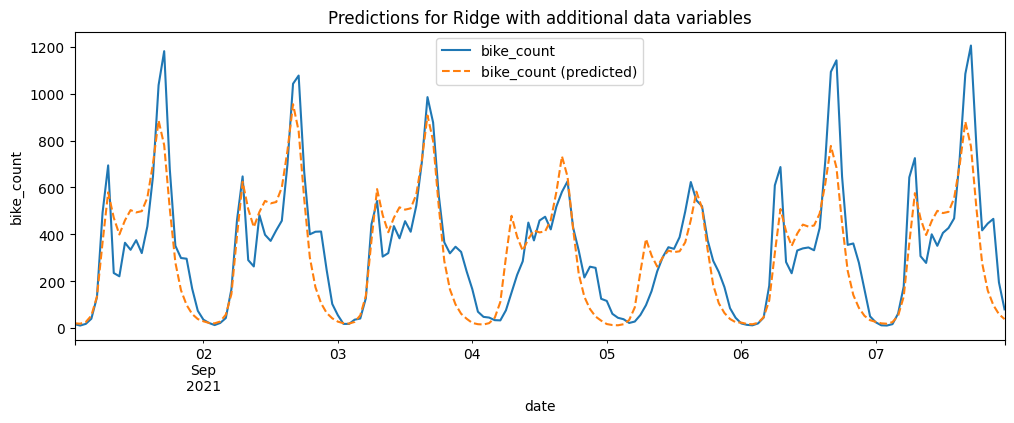

In [10]:
problem.week_plot(X_test, predicted_X_test ,y_test, "Ridge with additional data variables")


c:\Python\envs\bikes-ramp\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


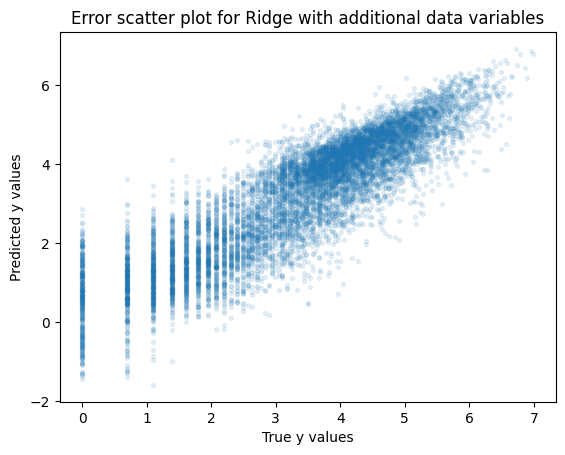

In [11]:
problem.error_plot(predicted_X_test,y_test,'Ridge with additional data variables')

### Ridge including aditional variables and weather data

In [12]:
date_encoder = FunctionTransformer(problem._encode_dates, kw_args={"drop_date": False})
date_cols = problem._encode_dates(X_train[["date"]]).columns.tolist()

add_date_encoder = FunctionTransformer(problem._additional_date_variables)
add_date_cols = ["season"]

categorical_encoder = OneHotEncoder(handle_unknown="ignore")
categorical_cols = ["counter_name", "site_name", "wdir"]

preprocessor = ColumnTransformer(
    [
        ("date", OneHotEncoder(handle_unknown="ignore"), date_cols),
        ("add_date", OneHotEncoder(handle_unknown="ignore"), add_date_cols),
        ("cat", categorical_encoder, categorical_cols),
    ]
)

regressor = Ridge()

pipe = make_pipeline(FunctionTransformer(problem._merge_external_data, validate=False), date_encoder, add_date_encoder, preprocessor, regressor)
pipe.fit(X_train, y_train)

Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function _merge_external_data at 0x000001CE55CDF160>)),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function _encode_dates at 0x000001CE55CD7CA0>,
                                     kw_args={'drop_date': False})),
                ('functiontransformer-3',
                 FunctionTransformer(func=<function _additional_date_variables at 0x000001CE55CDF0D0>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['year', 'month', 'day',
                                                   'weekday', 'hour']),
                                                 ('add_date',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['season']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['counter_name', 'site_name',
                                                   'wdir'])])),
                ('ridge', Ridge())])

In [13]:
predicted_X_train = pipe.predict(X_train)
predicted_X_test = pipe.predict(X_test)

print(
    f"Train set, RMSE={mean_squared_error(y_train, predicted_X_train, squared=False):.2f}"
)
print(
    f"Test set, RMSE={mean_squared_error(y_test, predicted_X_test, squared=False):.2f}"
)

Train set, RMSE=0.80
Test set, RMSE=0.72


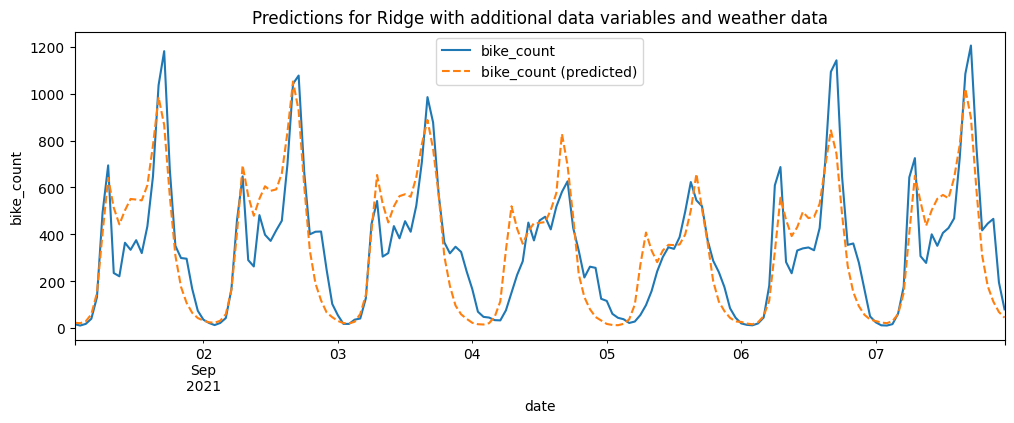

In [14]:
problem.week_plot(X_test, predicted_X_test ,y_test, "Ridge with additional data variables and weather data")

c:\Python\envs\bikes-ramp\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


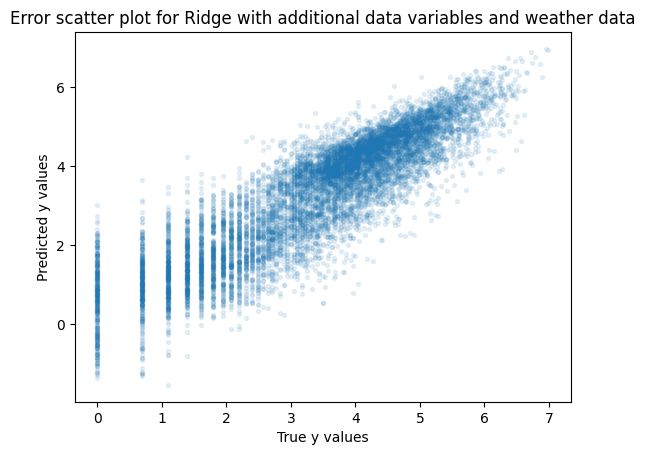

In [15]:
problem.error_plot(predicted_X_test, y_test, "Ridge with additional data variables and weather data")

### Lasso including additional data variables and weather data

In [16]:
date_encoder = FunctionTransformer(problem._encode_dates, kw_args={"drop_date": False})
date_cols = problem._encode_dates(X_train[["date"]]).columns.tolist()

add_date_encoder = FunctionTransformer(problem._additional_date_variables)
add_date_cols = ["season"]

categorical_encoder = OneHotEncoder(handle_unknown="ignore")
categorical_cols = ["counter_name", "site_name", "wdir"]

preprocessor = ColumnTransformer(
    [
        ("date", OneHotEncoder(handle_unknown="ignore"), date_cols),
        ("add_date", OneHotEncoder(handle_unknown="ignore"), add_date_cols),
        ("cat", categorical_encoder, categorical_cols),
    ]
)

regressor = Lasso()

pipe = make_pipeline(FunctionTransformer(problem._merge_external_data, validate=False), date_encoder, add_date_encoder, preprocessor, regressor)
pipe.fit(X_train, y_train)


Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function _merge_external_data at 0x000001CE55CDF160>)),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function _encode_dates at 0x000001CE55CD7CA0>,
                                     kw_args={'drop_date': False})),
                ('functiontransformer-3',
                 FunctionTransformer(func=<function _additional_date_variables at 0x000001CE55CDF0D0>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['year', 'month', 'day',
                                                   'weekday', 'hour']),
                                                 ('add_date',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['season']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['counter_name', 'site_name',
                                                   'wdir'])])),
                ('lasso', Lasso())])

In [17]:
predicted_X_train = pipe.predict(X_train)
predicted_X_test = pipe.predict(X_test)

print(
    f"Train set, RMSE={mean_squared_error(y_train, predicted_X_train, squared=False):.2f}"
)
print(
    f"Test set, RMSE={mean_squared_error(y_test, predicted_X_test, squared=False):.2f}"
)

Train set, RMSE=1.68
Test set, RMSE=1.49


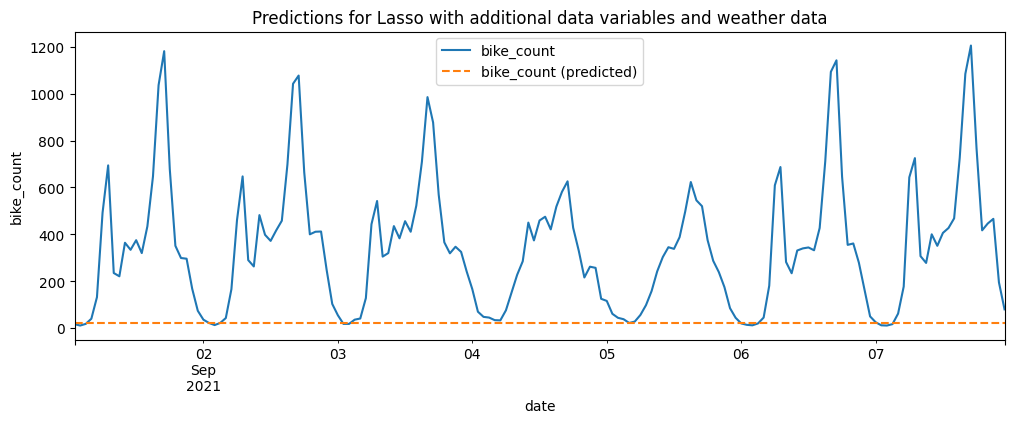

In [18]:
problem.week_plot(X_test,predicted_X_test,y_test, "Lasso with additional data variables and weather data")

c:\Python\envs\bikes-ramp\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


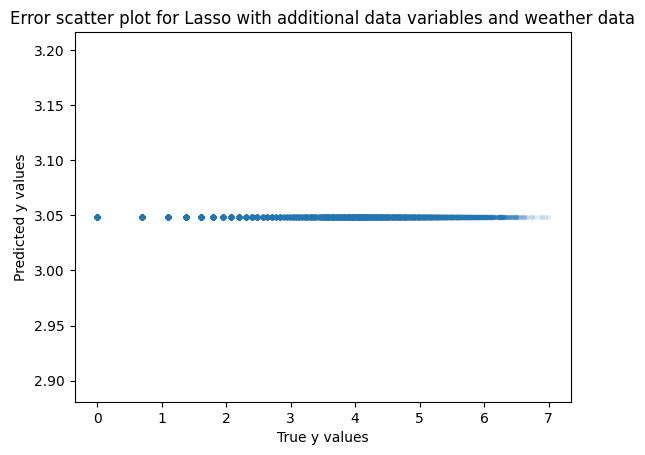

In [19]:
problem.error_plot(predicted_X_test, y_test, "Lasso with additional data variables and weather data")